In [47]:
#libraries
import numpy as np
import pandas as pd

#VISUALIZING LIBRARIES
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import GridSearchCV

#Deeo learning
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
!pip install -q tensorflow-hub
import tensorflow_hub as hub
from keras.wrappers.scikit_learn import kerasClassifier

ImportError: cannot import name 'kerasClassifier' from 'keras.wrappers.scikit_learn' (C:\Users\prave\Anaconda3\envs\aiml\lib\site-packages\keras\wrappers\scikit_learn.py)

In [46]:
!pip install wrapper

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wrapper: filename=Wrapper-1.1.0b1-py3-none-any.whl size=6248 sha256=656d9aeba3bff9a17c8d51a8191a8b77372fd9dfc9e09ae325e210fde175e273
  Stored in directory: c:\users\prave\appdata\local\pip\cache\wheels\6d\d5\2d\32b0d93cc15112e9d855cfc0089f2867957eabbe52fb805c65
Successfully built wrapper


!pip install pydot


In [38]:
#!pip install tensorflow==2.7.0

In [39]:
#pip install tensorflow

heading


In [40]:
#Digit MNIST dataset
(X_train_digit,y_train_digit), (X_test_digit,y_test_digit) = mnist.load_data()

In [41]:
X_train_digit

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [42]:
!pip install scikit-keras

In [43]:
!pip install classified

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [128 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\classified
  copying classified\checksum.py -> build\lib\classified
  copying classified\config.py -> build\lib\classified
  copying classified\incremental.py -> build\lib\classified
  copying classified\magic.py -> build\lib\classified
  copying classified\meta.py -> build\lib\classified
  copying classified\platform.py -> build\lib\classified
  copying classified\scanner.py -> build\lib\classified
  copying classified\utils.py -> build\lib\classified
  copying classified\__init__.py -> build\lib\classified
  creating build\lib\classified\probe
  copying classified\probe\all.py -> build\lib\classified\probe
  copying classified\probe\base.py -> build\lib\classified\probe
  copying classified\probe\__init__.py -> build\lib\classified\p


  Using cached classified-1.4.0.tar.gz (42 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for classified
Failed to build classified
  Running setup.py install for classified: started
  Running setup.py install for classified: finished with status 'error'


In [50]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

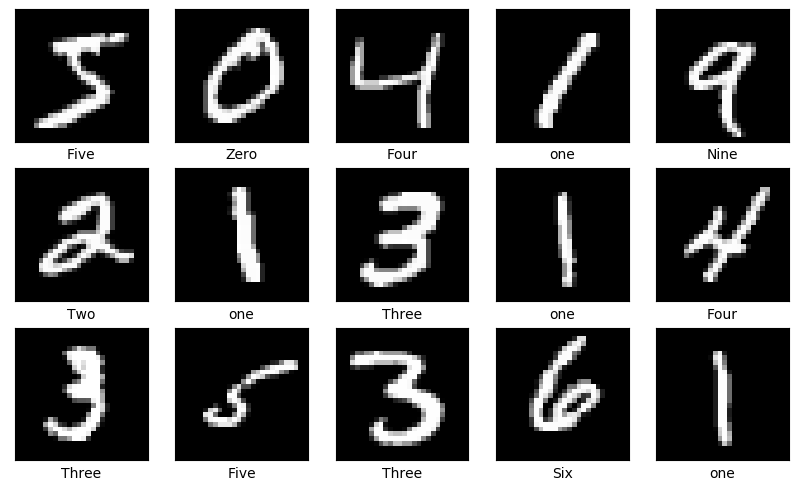

In [49]:
col_names = ['Zero','one','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#visualizing the digits
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i], cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

In [51]:
X_train_digit.shape


(60000, 28, 28)

In [52]:
X_train_digit = X_train_digit.reshape(60000, 784)
X_test_digit =X_test_digit.reshape(10000, 784)

In [53]:
X_train_digit.shape

(60000, 784)

In [55]:
y_test_digit.shape

(10000,)

In [56]:
#encoding digit mnist labels
y_train_digit = to_categorical(y_train_digit, num_classes=10)

y_test_digit = to_categorical(y_test_digit,num_classes=10)

In [61]:
y_train_digit[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [68]:
#creating base neural network
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    #layers.Dropout(0.3)
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3)
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3)
    #layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'),
])

In [69]:
#param number = output channel number * (input channel number +1)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 222,218
Trainable params: 222,218
Non-trainable params: 0
_________________________________________________________________


In [71]:
#compiling  the model
model.compile(loss="categorical_crossentropy",
optimizer="adam",
metrics = ['accuracy'])

In [73]:
history=model.fit(X_train_digit, y_train_digit, batch_size=100,epochs=10,validation_data=(X_test_digit, y_test_digit))

Epoch 1/10
600/600 [==============================] - 5s 6ms/step - loss: 1.4513 - accuracy: 0.8361 - val_loss: 0.3771 - val_accuracy: 0.9066
Epoch 2/10
600/600 [==============================] - 3s 6ms/step - loss: 0.2838 - accuracy: 0.9283 - val_loss: 0.2581 - val_accuracy: 0.9358
Epoch 3/10
600/600 [==============================] - 3s 6ms/step - loss: 0.2024 - accuracy: 0.9471 - val_loss: 0.2033 - val_accuracy: 0.9476
Epoch 4/10
600/600 [==============================] - 4s 6ms/step - loss: 0.1706 - accuracy: 0.9550 - val_loss: 0.2085 - val_accuracy: 0.9514
Epoch 5/10
600/600 [==============================] - 4s 6ms/step - loss: 0.1480 - accuracy: 0.9604 - val_loss: 0.1848 - val_accuracy: 0.9535
Epoch 6/10
600/600 [==============================] - 3s 6ms/step - loss: 0.1244 - accuracy: 0.9666 - val_loss: 0.1847 - val_accuracy: 0.9562
Epoch 7/10
600/600 [==============================] - 4s 6ms/step - loss: 0.1178 - accuracy: 0.9679 - val_loss: 0.1715 - val_accuracy: 0.9600
Epoch 